<img src="https://images.squarespace-cdn.com/content/v1/5b80256a25bf0202e059a9d3/40c9f7f3-e8eb-498d-b416-88e3f04d10d0/AdobeStock_362621618.jpeg" width="700">
<p style="text-align:right"><a href="https://images.squarespace-cdn.com/content/v1/5b80256a25bf0202e059a9d3/40c9f7f3-e8eb-498d-b416-88e3f04d10d0/AdobeStock_362621618.jpeg"></a></p>

# Introduction

Employee retention strategies are integral to the success and well-being of a company. There are often many reasons why employees leave an organization, and in this case study, I will explore some of the key drivers of employee attrition. Employee attrition measures how many workers have left an organization and is a common metric companies use to assess their performance. While turnover rates vary from industry to industry, the [Bureau of Labor Statistics reported](https://www.bls.gov/news.release/jolts.t18.htm#) that among voluntary separations the overall turnover rate was 25% in 2020.

In this notebook, I will explore IBM's [dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) on HR Analytics. The data consists of nearly 1,500 current and former employees with information related to their job satisfaction, work life balance, tenure, experience, salary, and demographic data. Below is a brief overview and summary statistics of the data.

### Business Problem
- Attrition is a problem that impacts all businesses, irrespective of geography, industry and size of the company.
- Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff and training new staff.
- As such, there is great business interest in understanding the drivers of, and minimizing staff attrition.

### About Dataset
- Dependent Variable : Attrition

- Independent Variable (31 different variables in total) :


    - Basic Info:
          Age, Gender, Education, Education Field, Martial Status, Distance From Home

    - Work Info:
          Department, Job Role, Job Level, Over Time, Business Travel, Performance Rating, Stock Option Level,
          Job Involvement

    - Statisfaction:
          Work-Life Balance, Job Satisfaction, Relationship Satisfaction, Enviroment Satisfaction

    - Salary Related:
          Monthly Income, Monthly Rate, Daily Rate, Hourly Rate, Percent Salary Hike

    - Time Related:
          Total Working Years,Traning Time Last Year,Years At Company,Years In Current Role,Years Since Last Promotion,
           Years With Current Manager,Num Companies Worked

## Importing Libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go
import scipy
from scipy.stats import chi2_contingency
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
from statistics import stdev
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
# Ignore warning messages
warnings.filterwarnings("ignore")

# Initialize Plotly notebook mode
init_notebook_mode(connected=True)

# Set seaborn context for plotting
sns.set_context("notebook")

## Loading Data

In [2]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Exploratory Data Analysis

 Find patterns in data through data visulazation, reveal hidden secrets of the data through graphs, analysis and charts.
 - Univariate analysis
    - continous variables (boxplot, histogram )
    - categorical variables (piechart, barplot )
 - Bivariate analysis
    - continous & continous (scatter plot)
    - continous & categorical (multiple boxplots, multiple histograms, barplot)
    - categorical & categorical (barplot)

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [5]:
# Display the dataset dimensions (rows and columns).
print("There are {:,} rows and {} columns in the data.".format(data.shape[0], data.shape[1]))

# Count and print the total missing values in the dataset.
print("There are {} missing values in the data.".format(data.isnull().sum().sum()))

There are 1,470 rows and 35 columns in the data.
There are 0 missing values in the data.


In [6]:
# check the columns in our data
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## <b><span style='color:#68A19B'>1.1</span> | Summary Statistics of numeric variables</b>

In [8]:
desc_stats = data.describe().T

# Create a custom style for the DataFrame visualization
def custom_style(val):
    color = '#606ff2'
    return f'background-color: {color}; color: white'

# Apply the custom style to the whole DataFrame
styled_desc_stats = desc_stats.style.applymap(custom_style)

# Apply background gradient to 'std' column using 'PuBu' colormap
styled_desc_stats = styled_desc_stats.background_gradient(subset=['std'], cmap='PuBu')

# Apply background gradient to '50%' column using 'PuBu' colormap
styled_desc_stats = styled_desc_stats.background_gradient(subset=['50%'], cmap='PuBu')

# Display the styled descriptive statistics DataFrame
styled_desc_stats

,count,mean,std,min,25%,50%,75%,max
Age,1470.000000,36.923810,9.135373,18.000000,30.000000,36.000000,43.000000,60.000000
DailyRate,1470.000000,802.485714,403.509100,102.000000,465.000000,802.000000,1157.000000,1499.000000
DistanceFromHome,1470.000000,9.192517,8.106864,1.000000,2.000000,7.000000,14.000000,29.000000
Education,1470.000000,2.912925,1.024165,1.000000,2.000000,3.000000,4.000000,5.000000
EmployeeCount,1470.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeNumber,1470.000000,1024.865306,602.024335,1.000000,491.250000,1020.500000,1555.750000,2068.000000
EnvironmentSatisfaction,1470.000000,2.721769,1.093082,1.000000,2.000000,3.000000,4.000000,4.000000
HourlyRate,1470.000000,65.891156,20.329428,30.000000,48.000000,66.000000,83.750000,100.000000
JobInvolvement,1470.000000,2.729932,0.711561,1.000000,2.000000,3.000000,3.000000,4.000000
JobLevel,1470.000000,2.063946,1.106940,1.000000,1.000000,2.000000,3.000000,5.000000


## <b><span style='color:#68A19B'>1.2</span> | Summary Statistics of categorical variables</b>

In [9]:
#Display the summary statistics for categorical columns
categorical_summary = data.select_dtypes(include=object).describe()
display(categorical_summary)

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [10]:
import pandas as pd

# Assuming 'data' is your DataFrame with categorical columns
cat_cols = data.select_dtypes(include=object).columns.tolist()

# Create a DataFrame to melt and count categorical values
cat_df = pd.DataFrame(data[cat_cols].melt(var_name='column', value_name='value')
                     .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])

# Define your custom style function
def custom_style(val):
    color = '#606ff2'
    return f'background-color: {color}; color: white'

# Apply the custom style to the whole DataFrame
styled_cat_df = cat_df.style.applymap(custom_style)

# Apply background gradient to the 'count' column using the 'PuBu' colormap
styled_cat_df = styled_cat_df.background_gradient(subset=['count'], cmap='PuBu')

# Display the styled categorical counts DataFrame
styled_cat_df



**our data is imbalanced, we'll use Sampling techniques to balance it later**

In [11]:
# Create a DataFrame to store unique values and data validity
data_validity = pd.DataFrame(columns=['Column', 'Min Value', 'Max Value'])

# Iterate through non-object columns
for column in data.columns:
    if data[column].dtype != object:
        min_val = data[column].min()
        max_val = data[column].max()

        # Append the information to the DataFrame
        data_validity = data_validity.append({'Column': column, 'Min Value': min_val, 'Max Value': max_val}, ignore_index=True)

# Display the styled DataFrame
styled_data_validity = data_validity.style
styled_data_validity



,Column,Min Value,Max Value
0,Age,18,60
1,DailyRate,102,1499
2,DistanceFromHome,1,29
3,Education,1,5
4,EmployeeCount,1,1
5,EmployeeNumber,1,2068
6,EnvironmentSatisfaction,1,4
7,HourlyRate,30,100
8,JobInvolvement,1,4
9,JobLevel,1,5


# Data Visualisation

In [12]:
fig=make_subplots(rows=1, cols=2,
                  subplot_titles=("", "Employee Attrition by Department"),
                  specs=[[{"type": "bar"}, {"type": "pie"}]])

# Bar chart
plot_df=data['Attrition'].value_counts(normalize=True)
plot_df=plot_df.mul(100).rename('Percent').reset_index().sort_values('Percent')
plot_df.rename(columns={'index':'Attrition'}, inplace=True)
plot_df['Attrition']=['Former Employees' if i == 'Yes' else 'Current Employees' for i in plot_df['Attrition']]
x=plot_df['Attrition']
y=plot_df['Percent']
fig.add_trace(
    go.Bar(x=x, y=y, text=y,opacity=.8,
           hovertemplate='Employee Attrition Rate<br>%{x}: %{y:.3}%<extra></extra>',
           showlegend=False), row=1, col=1)
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#1F0202'), marker_color=['#C02B34','#CDBBA7'])
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='gray')
fig.update_layout(yaxis_ticksuffix = '%')

# Pie chart
plot_df2=data[data.Attrition=='Yes']
plot_df2=plot_df2['Department'].value_counts(normalize=True)
plot_df2=plot_df2.mul(100).rename('Percent').reset_index().sort_values('Percent', ascending=False)
plot_df2.rename(columns={'index':'Department'}, inplace=True)
fig.add_trace(go.Pie(labels=plot_df2['Department'], values=plot_df2['Percent'], opacity=0.85, hole=0.4,
                     hovertemplate='%{label}<br>Attrition Rate: %{value:.3}%<extra></extra>',
                     marker_colors=['#587D65','#ADC4B2','#D1C9C2']), row=1, col=2)
fig.update_yaxes(tickmode = 'array', range=[0, 90], dtick=5)
fig.update_traces(textfont_size=14,textfont_color='black',marker=dict(line=dict(color='#28221D', width=1)))
fig.update_layout(title_text="Employee Attrition Statistics", font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show(renderer="colab")

- This small dashboard shows the attrition rates among employees in the previous quarter. Overall, around 16% of the employees have left the company, that is 237 out of 1470 total employee count. As we said before our target is imbalanced, This could raise an instrinc issue of the dataset since it is clearly biased towards employees who opt to stay at the company.. Among former employees, over half worked in Research & Development, while only 5% were from Human Resources.

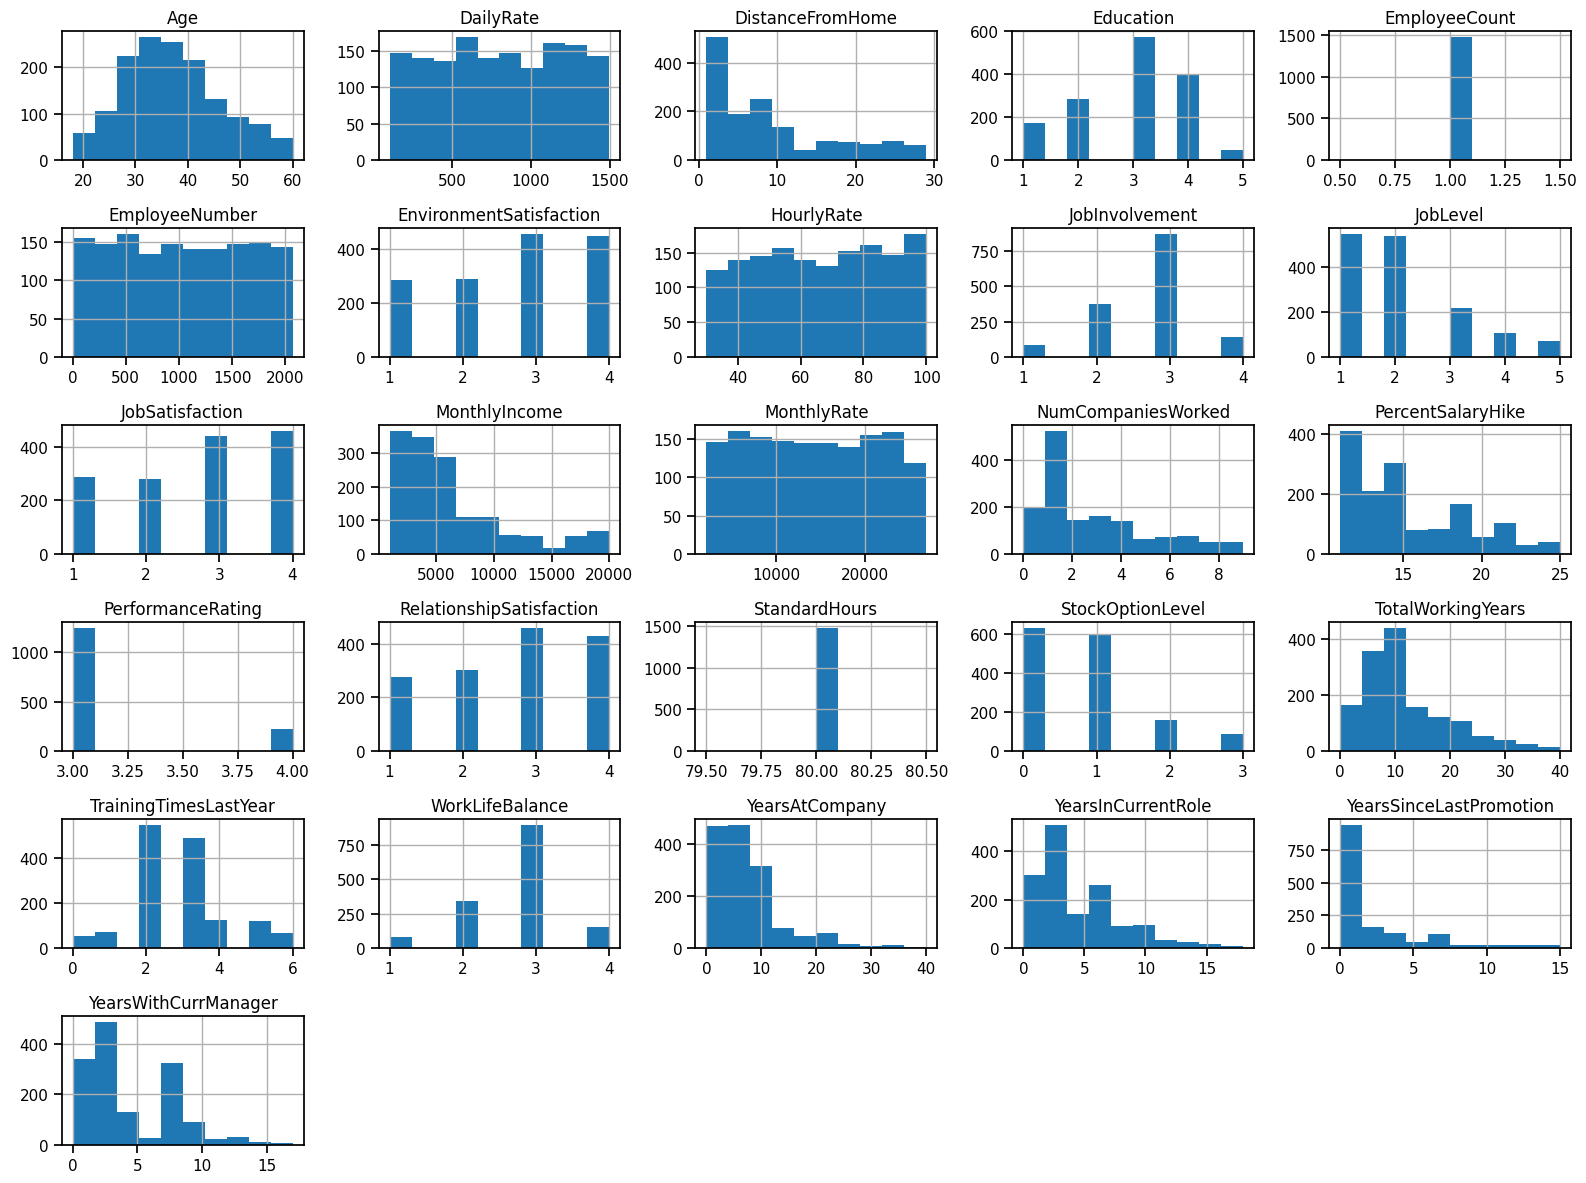

In [13]:
# Let's see the distrubtion of all numeric variables
data.hist(figsize=(16,12))
plt.tight_layout()


- columns: ['EmployeeCount' , 'Over18' , 'StandardHours']
are of no value because these remain the same for all employees, so we will not consider them in our analysis. We can drop them in preprocessing part.

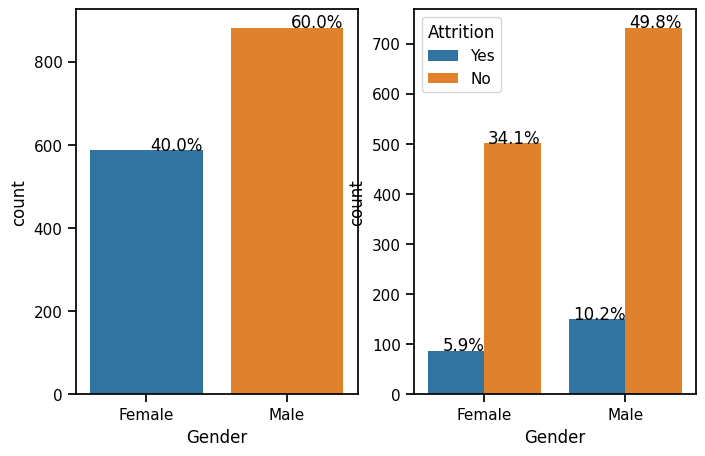

In [14]:
plt.figure(figsize=(8,5))
total = float(len(data))
plt.subplot(1,2,1)
ay=sns.countplot(x="Gender",data=data)
for p in ay.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ay.annotate(percentage, (x, y),ha='right')
plt.subplot(1,2,2)
ax = sns.countplot(x="Gender", hue="Attrition", data=data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='right')
plt.show()

- The ratio between numbers of males and females in the company are 1.5.
- Approximately 6%, 10% of females and males respectively left the company.
- The number of males which likely to leave the firm more than number of female.

In [15]:
plot_df = data.groupby(['Gender','Department'])['Attrition'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index()
fig = px.bar(plot_df, x="Department", y="Percent", color="Attrition", barmode="group",
            text='Percent', opacity=.75, facet_col="Gender", category_orders={'Attrition': ['Yes', 'No']},
            color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})
fig.update_traces(texttemplate='%{text:.3s}%', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'),  width=.4)
fig.update_layout(title_text='Attrition Rates by Department and Gender', yaxis_ticksuffix = '%',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0',font_color='#28221D',
                  height=500, xaxis=dict(tickangle=30))
fig.update_xaxes(showticklabels=True,tickangle=30,col=2)
fig.update_yaxes(title = "", zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.show(renderer="colab")

- Women in Human Resources experienced the highest amount of turnover, with nearly 1 out of every 3 women in HR leaving the company. For men, the highest turnover occurred in the Sales department.

<Axes: xlabel='Age', ylabel='Count'>

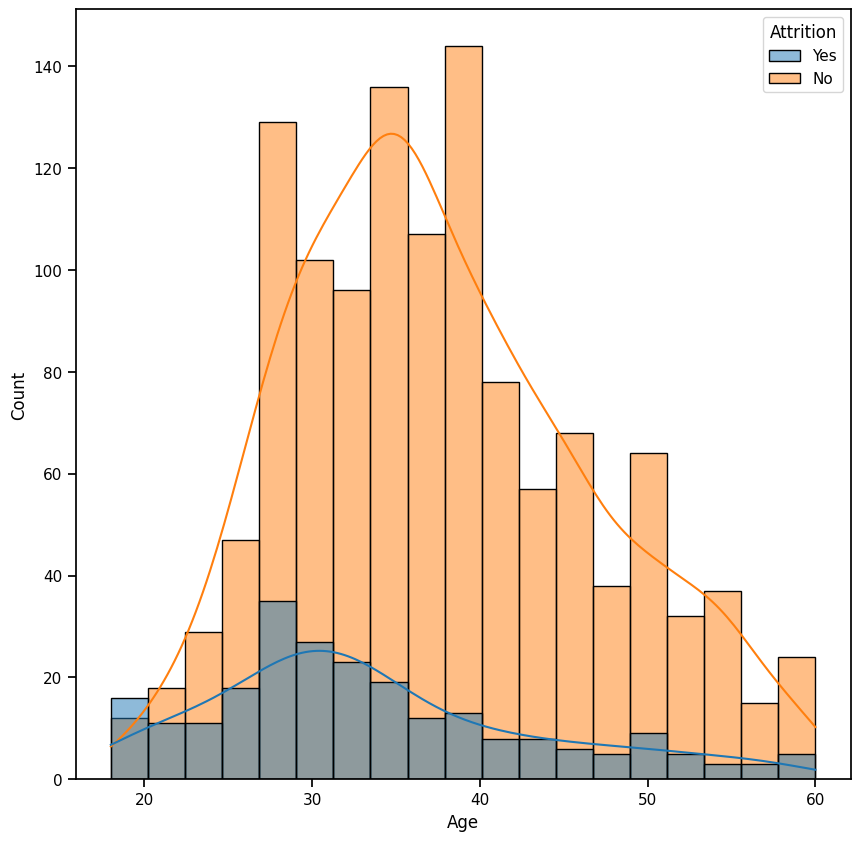

In [16]:
plt.figure(figsize = (10, 10))
sns.histplot(x = 'Age', hue = 'Attrition', data = data ,kde=True )

- The distribution of the age variable looks almost a bell-curved (Normal Distribution) where the median/mean are closely equal around the center.
- The majority of employee are between 28 - 36 years old, while the range of age are 18 - 60.
- The Company seems to be highly depended on segment of employees younger than 40 years old.
- We can identify a close pattern where younger employees had higher chance of attrition up to around 35.

In [17]:
plot_df = data.groupby(['Attrition'])['JobSatisfaction'].value_counts(normalize=True)
plot_df = plot_df.mul(100).rename('Percent').reset_index().sort_values('JobSatisfaction')
plot_df.JobSatisfaction=pd.Categorical(plot_df.JobSatisfaction).rename_categories(
    {1:'Poor', 2:'Neutral', 3:'Good', 4:'Excellent'})
fig = px.bar(plot_df, x='JobSatisfaction', y='Percent', text='Percent', opacity=0.8,
             facet_col="Attrition", category_orders={"Attrition": ["Yes", "No"]})
fig.update_traces(texttemplate='%{text:.2s}%', textposition='outside',
                  marker_color=['#B6735F', '#D7C2B0', '#497B7A', '#9EB5A3'],
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(title="",zeroline=True, zerolinewidth=1, zerolinecolor='#28221D', ticksuffix='%')
fig.update_layout(title_text='Attrition Rates by Job Satisfaction', bargap=.09,font_color='#28221D',
                  xaxis_title='Job Satisfaction',paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show(renderer="colab")

- Among employees who left, the majority were satisfied in their job with 53% rating their job satisfaction as Good or Excellent, while 28% were the least satisfied in their job.

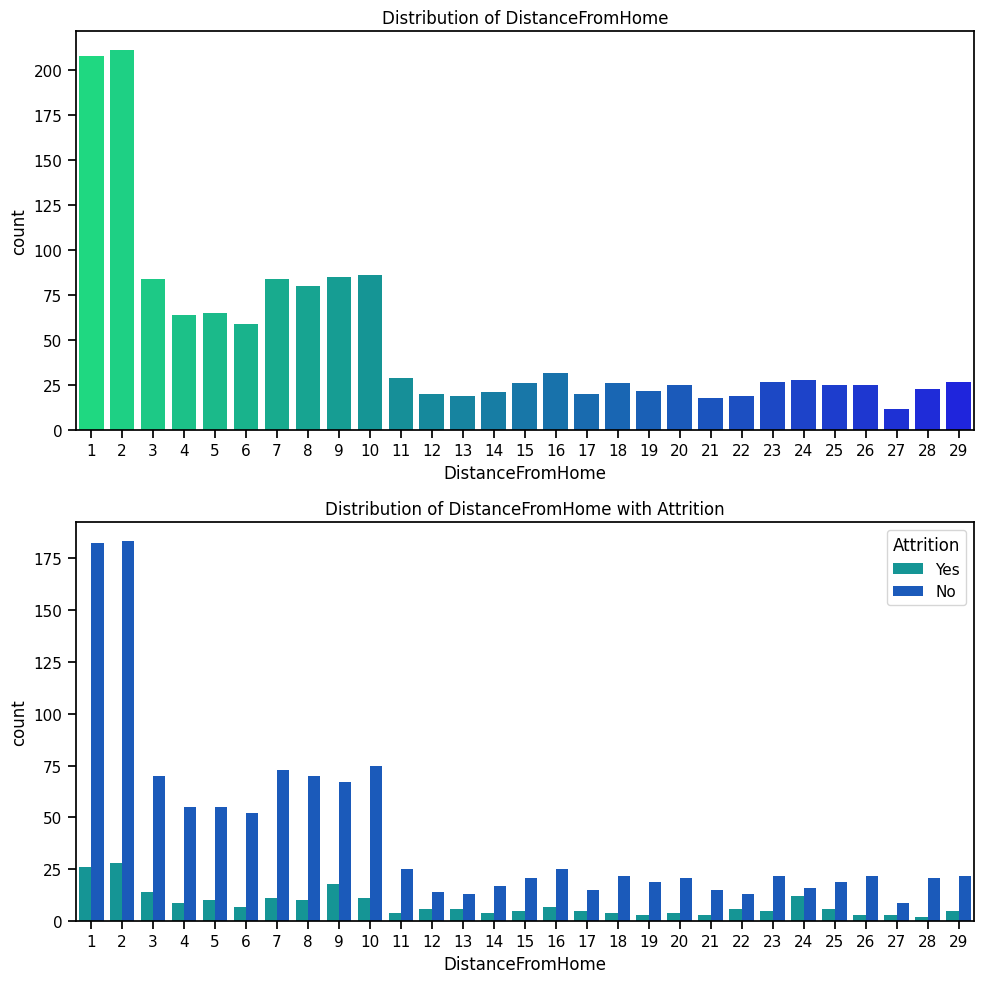

In [18]:
plt.figure(figsize=(10, 10))

# Create the first subplot without hue
plt.subplot(2, 1, 1)
sns.countplot(x='DistanceFromHome', data=data, palette='winter_r')
plt.title('Distribution of DistanceFromHome')

# Create the second subplot with hue 'Attrition' and specified marker colors
plt.subplot(2, 1, 2)
sns.countplot(x='DistanceFromHome', data=data, palette='winter_r', hue=data['Attrition'],
              hue_order=['Yes', 'No'],
              color=['#C02B34', '#CDBBA7'])
plt.title('Distribution of DistanceFromHome with Attrition')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()



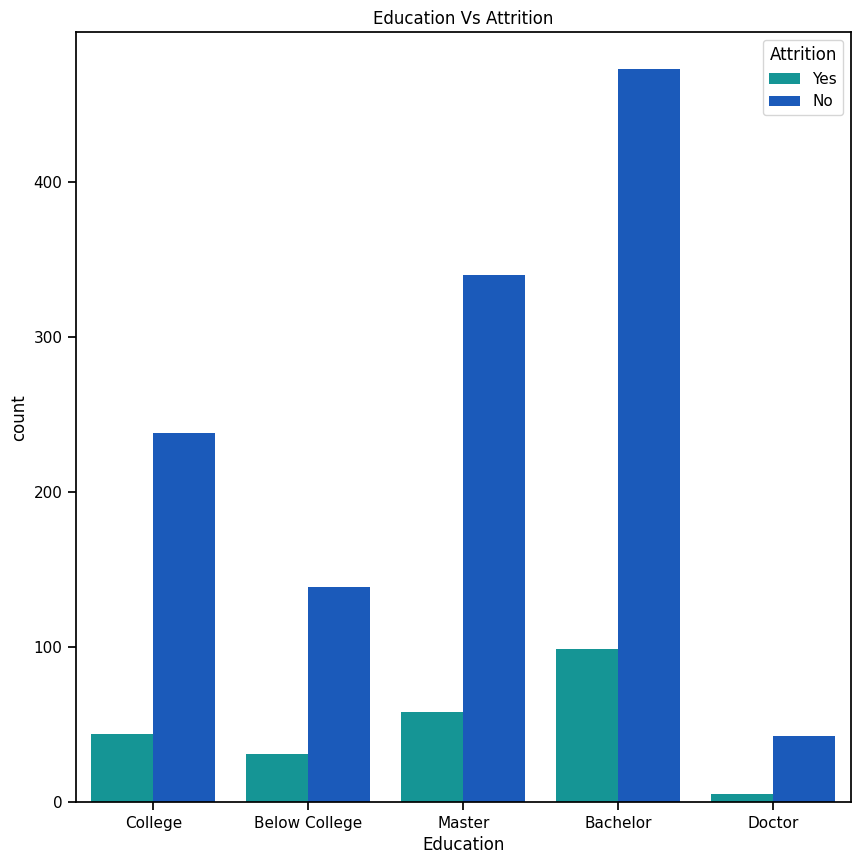

In [19]:
plt.figure(figsize=(10,10))
data['Education'] = data['Education'].replace([1,2,3,4,5],['Below College','College', 'Bachelor', 'Master', 'Doctor'])
sns.countplot(x= 'Education' ,data =data ,palette='winter_r',hue='Attrition')
plt.title('Education Vs Attrition')
plt.show()


- the employee of Bachelor degree tends to leave company than the people have any other degrees.

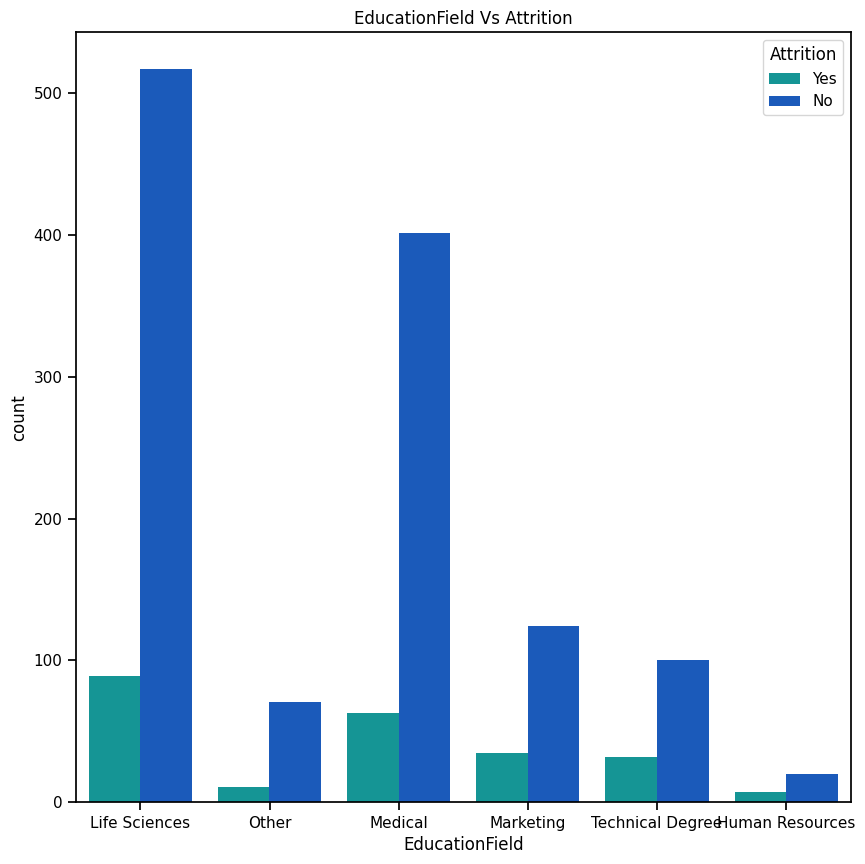

In [20]:
plt.figure(figsize=(10, 10))
sns.countplot(x='EducationField', data=data, palette='winter_r', hue='Attrition')
plt.title('EducationField Vs Attrition')
plt.show()


- Employees majored into the education field Life Sciences had the highest precentage of attrition, followed by Medical and Marketing.

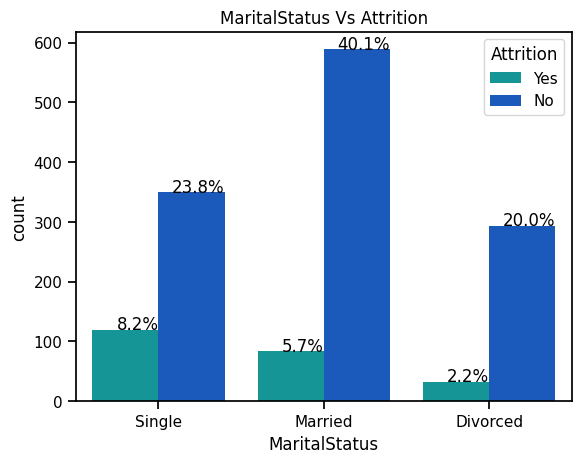

In [21]:
a=sns.countplot(x= 'MaritalStatus' ,data =data ,palette='winter_r',hue='Attrition')
plt.title('MaritalStatus Vs Attrition')
for p in a.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    a.annotate(percentage, (x, y),ha='right')

plt.show()

- The employee whose status labeled single have clear indication to leave the company, while the others who are married tend to be stable.

In [22]:
plot_df = data.groupby(['Department', 'Gender'])['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Department & Gender', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show(renderer="colab")

- Across each department, women on average have higher salaries than men.

In [23]:
plot_df = data.groupby(['Department', 'Attrition', 'Gender'])['MonthlyIncome'].median()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False).sort_values('Gender')
fig = px.bar(plot_df, x='Department', y='Salary', color='Gender', text='Salary',
             barmode='group', opacity=0.75, color_discrete_map={'Female': '#214D5C','Male': '#ACBCC2'},
             facet_col='Attrition', category_orders={'Attrition': ['Yes', 'No']})
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'))
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Median Salaries by Department and Attrition Status', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$',range=(0,79900)),width=950,height=500,
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show(renderer="colab")

- In comparison to current employees, former employees had lower median salaries across all three departments. In Human Resources, women tend to have higher median salaries than men.

In [24]:
plot_df = data.groupby('JobRole')['MonthlyIncome'].mean()
plot_df = plot_df.mul(12).rename('Salary').reset_index().sort_values('Salary', ascending=False)
fig = px.bar(plot_df, x='JobRole', y='Salary', text='Salary', opacity=0.7)
fig.update_traces(texttemplate='$%{text:,.0f}', textposition='outside',
                  marker_line=dict(width=1, color='#28221D'), marker_color='#3A5F53')
fig.update_yaxes(zeroline=True, zerolinewidth=1, zerolinecolor='#28221D')
fig.update_layout(title_text='Average Salaries by Job Role', font_color='#28221D',
                  yaxis=dict(title='Salary',tickprefix='$'), height=500,
                  xaxis_title='', paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show(renderer="colab")

- Managers and Research Directors have the highest average salaries, while Laboratory Technicians and Sales Representatives have the lowest.

In [25]:
plot_df=data.sort_values(by="Attrition")
fig=px.histogram(plot_df, x='MonthlyIncome', color='Attrition',
                 opacity=0.8, histnorm='density', barmode='overlay', marginal='box',
                 color_discrete_map={'Yes': '#C02B34','No': '#CDBBA7'})
fig.update_layout(title_text='Distribution of Monthly Income by Attrition Status',
                  xaxis_title='Monthly Income, $', yaxis_title='Density',font_color='#28221D',
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0', legend_traceorder='reversed')
fig.show(renderer="colab")

- The distribution of monthly income for both current and former employees is positively skewed and lower overall among staff who left. Former employees had a median monthly income more than $2,000 less than current employees.

In [26]:
fig=go.Figure()
colors=['#214D5C','#91ABB4']
for i, j in enumerate(data['Gender'].unique()):
    df_plot=data[data['Gender']==j]
    fig.add_trace(go.Box(x=df_plot['WorkLifeBalance'], y=df_plot['MonthlyIncome'],
                         notched=True, line=dict(color=colors[i]),name=j))
fig.update_layout(title='Distribution of Monthly Income by Work Life Balance',
                  xaxis_title='Work Life Balance', boxmode='group', font_color='#28221D',
                  xaxis = dict(tickmode = 'array', tickvals = [1, 2, 3, 4],
                               ticktext = ['Poor', 'Fair', 'Good', 'Excellent']),
                  paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show(renderer="colab")

- Women with the lowest-rated work life balance have the highest median salary out of all of the groups at $5,400/month.

In [27]:
plot_df = data.copy()
plot_df['JobLevel'] = pd.Categorical(
    plot_df['JobLevel']).rename_categories(
    ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])
col=['#73AF8E', '#4F909B', '#707BAD', '#A89DB7','#C99193']
fig = px.scatter(plot_df, x='TotalWorkingYears', y='MonthlyIncome',
                 color='JobLevel', size='MonthlyIncome',
                 color_discrete_sequence=col,
                 category_orders={'JobLevel': ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive']})
fig.update_layout(legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1),
                  title='Monthly income increases with total number of years worked and job level <br>',
                  xaxis_title='Total Working Years', yaxis=dict(title='Income',tickprefix='$'),
                  legend_title='', font_color='#28221D',
                  margin=dict(l=40, r=30, b=80, t=120),paper_bgcolor='#F4F2F0', plot_bgcolor='#F4F2F0')
fig.show(renderer="colab")

- Based on the scatterplot above, monthly income is positively correlated with total number of years worked and there is strong association between an employee's earnings and their job level.

In [28]:
import plotly.figure_factory as ff
cat_cols=[]
for i in data.columns:
    if data[i].nunique() <= 5 or data[i].dtype == object:
        cat_cols.append(i)
df=data.copy()
df.drop(df[cat_cols], axis=1, inplace=True)
df.drop('EmployeeNumber', axis=1, inplace=True)
corr=df.corr().round(2)
x=corr.index.tolist()
y=corr.columns.tolist()
z=corr.to_numpy()
fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=z, name='',
                                  hovertemplate="Correlation between %{x} and %{y}= %{z}",
                                  colorscale='GnBu')
fig.update_yaxes(autorange="reversed")
fig.update_layout(title="Correlation Matrix of Employee Attrition",
                  font_color='#28221D',margin=dict(t=180),height=600)
fig.show(renderer="colab")

- Confirming our findings in the scatterplot above, MonthlyIncome has a strong positive correlation to TotalWorkingYears of 0.77. Additionally, YearsAtCompany has a strong positive association with YearsWithCurrManager (correlation = 0.77), as well as with YearsInCurrentRole (correlation = 0.76). There are no variables with a correlation above 0.8, indicating a potential collinearity issue.

# Key Inferences
- Males have a higher rate of attrition.
- Females are earning a little higher than males.
- Employee with 6 years in Current Role is earning more than an employee carrying 14 years in Current Role.
- Young professionals are more likely to leave the firm.
- Sales Representative tends to leave more other roles because they have lower income compared with other roles.
- As the level of education increases , average monthly income increases.
- More employees tend to leave when the distance from home is more than 10 km.
- Single employees tends to leave because they have low MonthlyIncome compared by other.
- An innovative structure needs to be implemented for employees with 1 year of experience as it is majorly contributing to the attrition %
- Drop in income for Employees having 15 years of Experience in the company.
- Need to come up with better stock options for people with more than 6+ years in Current Role as attrition seems to increase gradually with a drop in monthly income.
- Employees are dissatisfied with the environment conditions and JobSatisfaction tend to leave more compared with other.
- to avoid attrition, the company have to:
       1. Fairly pay employees at the same job level , same job involvement , same job role with almost equal monthly
           income and stocks .
       2 .  Offer stock options to more employees especially new recruits as an incentive .
       3 .  Increase allowance for employees to work overtime , and make sure that those working overtime are being paid
            more than those who are not.
       4. companies should remember to appreciate their employees and work on the harmonic balance of their company.
- At the end, we have seen strong features that could determine employees' attrition such as (Over Time, Distance From Home, Years Since Last Promotion)

# Data Cleaning and Preprocessing

There are several columns in the data that have numeric values that represent categories, like Education that has values of 1 through 5 representing different levels of education. These columns were converted to categorical variables to perform significance testing for feature selection. I then removed columns with zero variance from the data since these can lead to errors in model fitting. Lastly, to reduce the skewness in the data, I log-transformed variables that had a skewness above 0.75.

In [29]:
# Checking for variables with 0 variance
norm_df=data.copy()
nzv=[]
for i in norm_df[cat_cols]:
    norm_df[i]=pd.factorize(norm_df[i])[0]
for i in norm_df.columns:
    if stdev(norm_df[i]) == 0.0:
        nzv.append(i)

# Converting cols to category
for i in data[cat_cols]:
    if i=='Attrition':
        continue
    data[i] = pd.Categorical(data[i])

# Removing variables with 0 variance and Employee Number
print("Dropping variables with zero variance:", nzv)
data.drop(data[nzv], axis=1, inplace=True)
data.drop('EmployeeNumber', axis=1, inplace=True)
df=data.copy()
df.shape


Dropping variables with zero variance: ['EmployeeCount', 'Over18', 'StandardHours']


(1470, 31)

In [30]:
#Check for variables with skew above 0.75
df=data.copy()
skew_limit = 0.75
skew_vals = df.skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

display(skew_cols.style.set_caption('Columns to be log-transformed:'))

# Log-transform skewed variables
for i in skew_cols.index.values:
    df[i] = df[i].apply(np.log1p)

,Skew
YearsSinceLastPromotion,1.984290
YearsAtCompany,1.764529
MonthlyIncome,1.369817
TotalWorkingYears,1.117172
NumCompaniesWorked,1.026471
DistanceFromHome,0.958118
YearsInCurrentRole,0.917363
YearsWithCurrManager,0.833451
PercentSalaryHike,0.821128


# Hypothesis Testing

## <b><span style='color:#68A19B'>I.</span> Independent T-Test</b>



To compare the average monthly income among current and former employees, I'll perform an independent t-test. This will allow us to determine whether there is a statistically significant difference between the average incomes of the two populations. To test this, I'll use the log-transformed data since one of the assumptions of the test is that the continuous variable is approximately normally distributed.

#### Hypothesis:

$H_{0}$: The null hypothesis for the t-test is that the average monthly income of former employees is the same as current employees.
$$
  u_{1} = u_{2}
$$  
$H_{1}$: The alternative hypothesis is that the average monthly income of former employees is different than current employees.
$$
  u_{1} \neq u_{2}
$$

In [31]:
#!pip install researchpy
import researchpy as rp
summary, res=rp.ttest(group1=df['MonthlyIncome'][df['Attrition']=='Yes'],
                      group2=df['MonthlyIncome'][df['Attrition']=='No'],
                      group1_name='Former Employees', group2_name='Current Employees')
print("\nSummary Statistics:")
display(summary)
display(res)


Summary Statistics:


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Former Employees,237.0,8.252532,0.640059,0.041576,8.170624,8.334440
1,Current Employees,1233.0,8.610458,0.653497,0.018611,8.573946,8.646970
2,combined,1470.0,8.552752,0.664313,0.017327,8.518764,8.586739


,Independent t-test,results
0,Difference (Former Employees - Current Employe...,-0.3579
1,Degrees of freedom =,1468.0000
2,t =,-7.7477
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.5495
7,Hedge's g =,-0.5492
8,Glass's delta1 =,-0.5592
9,Point-Biserial r =,-0.1982


- The p-value of the T-Test is 0, which is less than our significance level, $a$, of 0.05. Therefore, there is evidence to support that the average monthly income of former employees is different than the average monthly income of current employees.

## <b><span style='color:#68A19B'>II.</span> Chi-Square Test of Independence</b>

To determine if there is a relationship between `Attrition` and the other categorical variables in the data set, I will use the chi-square test of independence. The null hypothesis for this test is that the variables are independent, there is no association between `Attrition` and the variable being tested, while the alternative hypothesis is that that there is a relationship.

In [32]:
cat_cols=df.select_dtypes(include="category").columns.tolist()
chi_statistic=[]
p_val=[]
vars_rm=[]

for i in df[cat_cols]:
    observed=pd.crosstab(index=df["Attrition"], columns=df[i])
    stat, p, dof, expected=chi2_contingency(observed)
    chi_statistic.append(stat)
    p_val.append(p)
    if p >= 0.05:
        print("Attrition and {} are independent (p-value = {:.2f}).\n".format(i,p))
        vars_rm.append(i)

chi_df = pd.DataFrame()
chi_df["Variable"] = cat_cols
chi_df["Chi_Statistic"] = chi_statistic
chi_df["P_value"] = p_val
chi_df=chi_df[chi_df.P_value<0.05].sort_values("P_value", ascending=True)
display(chi_df)

Attrition and Education are independent (p-value = 0.55).

Attrition and Gender are independent (p-value = 0.29).

Attrition and PerformanceRating are independent (p-value = 0.99).

Attrition and RelationshipSatisfaction are independent (p-value = 0.15).



,Variable,Chi_Statistic,P_value
11,OverTime,87.564294,8.158424e-21
8,JobRole,86.190254,2.752482e-15
7,JobLevel,72.529013,6.634685e-15
14,StockOptionLevel,60.598301,4.379390e-13
10,MaritalStatus,46.163677,9.455511e-11
6,JobInvolvement,28.492021,2.863181e-06
0,BusinessTravel,24.182414,5.608614e-06
4,EnvironmentSatisfaction,22.503881,5.123469e-05
9,JobSatisfaction,17.505077,5.563005e-04
15,WorkLifeBalance,16.325097,9.725699e-04


Based on the chi square test results, factors that are significant in whether an employee stays at the company include their work life balance, job satisfation, whether or not they work overtime, their stock options, and the department they work in. Variables that are independent of attrition, like `Education`, `Gender`, `PerformanceRating`, and `RelationshipSatisfaction`, will be removed from the predictors in the model.

# Predicting Employee Attrition

## <b><span style='color:#68A19B'>I.</span>  Encode Categorical Columns</b>

In [33]:
y=df['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
X=df.loc[:, df.columns != 'Attrition']
X.drop(X[vars_rm], axis=1, inplace=True)
X=pd.get_dummies(X, columns=chi_df.Variable.values, drop_first=True)
X.columns=X.columns.str.replace(' ', '')
X.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Department_Research&Development,Department_Sales,EducationField_LifeSciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_TechnicalDegree
0,41,1102,0.693147,94,8.698514,19479,2.197225,2.484907,2.197225,0,...,0,0,0,0,1,1,0,0,0,0
1,49,279,2.197225,61,8.543056,24907,0.693147,3.178054,2.397895,3,...,0,1,0,1,0,1,0,0,0,0
2,37,1373,1.098612,92,7.645398,2396,1.945910,2.772589,2.079442,3,...,0,1,0,1,0,0,0,0,1,0
3,33,1392,1.386294,56,7.975908,23159,0.693147,2.484907,2.197225,3,...,0,1,0,1,0,1,0,0,0,0
4,27,591,1.098612,40,8.151622,16632,2.302585,2.564949,1.945910,3,...,0,1,0,1,0,0,0,1,0,0


## <b><span style='color:#68A19B'>II.</span> Create Training, Validation, and Test Sets</b>

In [34]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=21)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=21)

print("Train Shape:", X_train.shape, y_train.shape)
print("Validation set Shape:", X_val.shape,y_val.shape)
print("Test set Shape:", X_test.shape, y_test.shape)

Train Shape: (1029, 53) (1029,)
Validation set Shape: (220, 53) (220,)
Test set Shape: (221, 53) (221,)


## <b><span style='color:#68A19B'>III.</span> Scale Features</b>

In [35]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,...,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Department_Research&Development,Department_Sales,EducationField_LifeSciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_TechnicalDegree
0,0.039281,-1.431033,-0.023528,1.548533,0.340625,1.223427,0.781625,-0.229651,-0.269199,1.731250,...,-0.542531,-1.261721,2.950855,-1.374936,1.515941,-0.822129,-0.349482,1.448930,-0.23763,-0.322610
1,-1.056109,1.632008,-1.477589,0.767530,-0.455105,0.525874,-0.582044,-1.269425,-0.677718,-0.607642,...,-0.542531,0.792568,-0.338885,0.727306,-0.659656,-0.822129,-0.349482,1.448930,-0.23763,-0.322610
2,0.039281,1.493788,-0.202448,0.865156,-0.584167,1.596613,-1.613621,-0.229651,-0.269199,-0.607642,...,-0.542531,-1.261721,-0.338885,0.727306,-0.659656,-0.822129,-0.349482,-0.690165,-0.23763,3.099717
3,-0.179797,1.449361,0.390459,-0.892100,-0.022621,0.641145,-0.582044,1.110851,0.183017,1.731250,...,-0.542531,0.792568,-0.338885,0.727306,-0.659656,-0.822129,-0.349482,1.448930,-0.23763,-0.322610
4,2.339599,-0.500520,1.305609,0.279404,1.850835,-0.337603,0.781625,-0.551134,1.607744,-0.607642,...,1.843213,-1.261721,-0.338885,-1.374936,1.515941,1.216354,-0.349482,-0.690165,-0.23763,-0.322610


## <b><span style='color:#68A19B'>IV.</span>  Tune Parameters of Random Forest</b>

In [36]:
# Parameter tuning
grid = {'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)],
        'max_features': [None, 'sqrt'],
        'max_depth': [None, 5, 7, 14, 21],
        'min_samples_split': [2, 5, 8],
        'min_samples_leaf': [3, 4, 5],
        'bootstrap': [True, False]}

rf=RandomForestClassifier(random_state=92)
rf_cv=RandomizedSearchCV(estimator=rf, param_distributions=grid, scoring='roc_auc',
                         n_iter=100, cv=5, random_state=92, n_jobs=-1)
rf_cv.fit(X_train, y_train)
print("Grid Search CV Best AUC = {:.3f}\nBest Params: {}".format(rf_cv.best_score_, rf_cv.best_estimator_))

Grid Search CV Best AUC = 0.777
Best Params: RandomForestClassifier(bootstrap=False, max_depth=7, min_samples_leaf=4,
                       min_samples_split=5, random_state=92)


Using cross-validation to tune the parameters, the random forest model with the best Area Under the Curve grows to a maximum depth of no more than 7 splits in each tree. The subset of features considered when looking for the best split is the squareroot of the total number of features. In addition, at least 5 samples are required to split an internal node with a minimum of 4 samples in each leaf node.

## <b><span style='color:#68A19B'>V.</span>    Feature importance</b>

In [37]:
col=sns.color_palette("mako", 20).as_hex()[::-1]
feat=pd.DataFrame({"Importance": rf_cv.best_estimator_.feature_importances_}, index=X_train.columns
                 ).sort_values(by="Importance")
plot_df=feat.nlargest(15, columns='Importance').sort_values(by="Importance", ascending=False)
fig = px.bar(plot_df, x=plot_df.index, y='Importance', text='Importance',
             color=plot_df.index, opacity=0.7, color_discrete_sequence=col)
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside',
                  marker_line=dict(width=1, color='#3F3B3A'),
                  hovertemplate='%{x}<br>Importance = %{y:.2f}')
fig.update_layout(title_text='Top 15 Most Important Predictors of Employee Attrition',
                  coloraxis_showscale=False, showlegend=False,font_color="#303030", height = 500,
                  paper_bgcolor='white', plot_bgcolor='white', yaxis_title="Importance",
                  xaxis = dict(title="", showgrid=True, gridcolor="#f5f5f5"))
fig.show(renderer="colab")

This bar graph shows the most important variables in predicting employee attrition using random forest's Gini importance measure. Variable importance is calculated by the decrease in the tree node's impurity from splitting on that feature, averaged over all of the trees in the model. Based on this graph, monthly income, age, and working overtime are the most important predictors of employee attrition. In addition, information related to their job history, like the total number of years they've worked and the length of time they've been with the company and with their current manager, as well as their proximity to the office and salary rate increases are some of the most important contributors in predicting employee attrition.

## <b><span style='color:#68A19B'>VI.</span> Model evaluation</b>

In [38]:
val_auc=roc_auc_score(y_val, rf_cv.predict_proba(X_val)[:,1])
test_auc=roc_auc_score(y_test, rf_cv.predict_proba(X_test)[:,1])
val_acc=accuracy_score(y_val, rf_cv.predict(X_val))
test_acc=accuracy_score(y_test, rf_cv.predict(X_test))
print("Validation Accuracy: {:.1f}% and AUC = {:.3f}".format(val_acc*100, val_auc))
print("Test set Accuracy: {:.1f}% and AUC = {:.3f}".format(test_acc*100, test_auc))

Validation Accuracy: 83.6% and AUC = 0.774
Test set Accuracy: 84.2% and AUC = 0.816


# Conclusion

In this analysis, we found that 16% of employees left the company in the previous quarter, with more than half leaving from the Research & Development department. Among women, the highest turnover occurred in the Human Resources department. About 1 in every 4 workers with the lowest work-life balance left the company, though the majority of employees who left rated their job satisfaction as good or excellent. Among former employees, salary was found to be significantly lower, with a median monthly income about $2,000/month less than current employees. Variables that were found not to be significant in whether an employee left include their education level, performance rating, and gender.

Based on the feature importances from the Random Forest model, an employee's age, income, tenure and job history with the company were among the most influential predictors of employee attrition. With these features, our model was able to predict the likelihood of an employee leaving the company with an Area Under the Curve of 0.774 on the validation set and 0.816 on the test set. To further improve on the model, additional data on employees who left or using weighted sampling methods could be used to help with handling the class imbalance in our data.